# Crab Pulsar Long-term Analysis

Unveiling the Crab Pulsar's Spin-Down with AstroSat LAXPC & CZTI
The Crab pulsar, a rapidly spinning neutron star remnant within the Crab Nebula, offers a unique opportunity to study the evolution of these celestial dynamos. Its rotational period, measured in milliseconds (ms), gradually increases as it loses energy, a phenomenon known as spin-down. Precise measurements of this change provide crucial insights into the pulsar's internal structure and magnetic field configuration.

Historical radio observations have established a long-term spin-down rate for the Crab pulsar (Lyne et al., 1993, A&A, 279, L14; Harding et al., 2017, A&A, 600, A30), but X-ray observations offer complementary information. AstroSat, India's multi-wavelength observatory launched in 2015, boasts the LAXPC and CZTI instruments capable of capturing the Crab pulsar's X-ray pulsations.

This project leverages these X-ray observations (available at https://drive.google.com/drive/folders/1oWiSo6ozi3ZaSA9RaeolKJA8l0dKcsdN) to:

Cross-Calibration: Compare our X-ray-derived spin-down rate with established values from radio observations to assess consistency across wavelengths.
This analysis will be conducted using established timing analysis techniques for X-ray data reduction (kaa_astro: https://arxiv.org/pdf/1410.0886). The results will be presented as a pulse period vs. time plot, providing a clear visualization of the pulsar's rotational evolution. Additionally, we will quantify any deviations in the spin-down rate observed over time.

This project contributes to a more comprehensive understanding of the Crab pulsar's spin-down behavior and offers valuable insights into its energy loss mechanisms. By combining data from different wavelengths, we can further refine our understanding of these fascinating objects.

In [ ]:
# Install required packages
!pip install astropy numpy matplotlib

In [ ]:
import numpy as np
from astropy.io import fits
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt

# Mount Google Drive to access FITS files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Keywords

**Lomb-Scargle Periodogram:** This powerful tool analyzes the timing data to identify the most likely rotation period of the pulsar. The function uses the LombScargle class to calculate the power at each frequency (power).

**Peak Frequency:** The code identifies the frequency with the highest power (np.argmax(power)) as the most probable rotation frequency.

**Period Calculation:** Since frequency and period are inversely proportional, the function calculates the period (1 / best_frequency) by taking the reciprocal of the peak frequency.

**Barycentric Correction:** Crucial for precise timing analysis, this step accounts for the Earth's motion around the Sun. The function defines the pulsar's celestial coordinates using SkyCoord and sets the Earth's location at its geocenter (EarthLocation.from_geocentric). It then calculates the light travel time from the pulsar to Earth's center, correcting the raw timestamps (times) by this offset.

In [ ]:
def load_and_correct_times(fits_file, ra, dec):
    with fits.open(fits_file) as hdul:
        data = hdul[1].data
        times = Time(data['TIME'], format='cxcsec')

    # Perform barycentric correction
    coords = SkyCoord(ra, dec, unit=(u.deg, u.deg), frame='icrs')
    # earth_location = EarthLocation.of_site('geocenter')  # or use specific observatory coordinates
    earth_location = EarthLocation.from_geocentric(0, 0, 0, unit=u.m)  # Earth's center
    barycentric_times = times.light_travel_time(coords, kind='barycentric', location=earth_location)
    corrected_times = times + barycentric_times

    return corrected_times.unix

def calculate_period(times, min_freq, max_freq):
    frequencies = np.linspace(min_freq, max_freq, 10000)
    power = LombScargle(times, np.ones_like(times)).power(frequencies)
    best_frequency = frequencies[np.argmax(power)]
    return 1 / best_frequency

def analyze_observation(fits_file, ra, dec, year):
    times = load_and_correct_times(fits_file, ra, dec)
    period = calculate_period(times, 1/0.034, 1/0.032)  # Search around 33 ms period
    return year, period

In [ ]:
#@title Define Crab pulsar coordinates and observations
crab_ra, crab_dec = 83.63308, 22.01450  # Crab pulsar coordinates
observations = [

    ("/content/drive/MyDrive/BAH24/2015/AS1P01_156T01_9000000122lxp1BB_level1.fits", 2015),
    ("/content/drive/MyDrive/BAH24/2015/AS1P01_156T01_9000000122lxp2BB_level1.fits", 2015),
    ("/content/drive/MyDrive/BAH24/2015/AS1P01_156T01_9000000122lxp3BB_level1.fits", 2015),
    ("/content/drive/MyDrive/BAH24/2015/AS1P01_156T01_9000000122lxp1EA_level1.fits", 2015),
    ("/content/drive/MyDrive/BAH24/2015/AS1P01_156T01_9000000122lxp2EA_level1.fits", 2015),
    ("/content/drive/MyDrive/BAH24/2015/AS1P01_156T01_9000000122lxp3EA_level1.fits", 2015),

    ("/content/drive/MyDrive/BAH24/2016/AS1A02_090T01_9000000778lxp3EA_level1.fits", 2016),
    ("/content/drive/MyDrive/BAH24/2016/AS1A02_090T01_9000000778lxp3BB_level1.fits", 2016),
    ("/content/drive/MyDrive/BAH24/2016/AS1A02_090T01_9000000778lxp2BB_level1.fits", 2016),
    ("/content/drive/MyDrive/BAH24/2016/AS1A02_090T01_9000000778lxp1BB_level1.fits", 2016),
    ("/content/drive/MyDrive/BAH24/2016/AS1A02_090T01_9000000778lxp2EA_level1.fits", 2016),
    ("/content/drive/MyDrive/BAH24/2016/AS1A02_090T01_9000000778lxp1EA_level1.fits", 2016),

    ("/content/drive/MyDrive/BAH24/2017/AS1T01_206T01_9000001694lxp1BB_level1.fits", 2017),
    ("/content/drive/MyDrive/BAH24/2017/AS1T01_206T01_9000001694lxp2BB_level1.fits", 2017),
    ("/content/drive/MyDrive/BAH24/2017/AS1T01_206T01_9000001694lxp3BB_level1.fits", 2017),
    ("/content/drive/MyDrive/BAH24/2017/AS1T01_206T01_9000001694lxp1EA_level1.fits", 2017),
    ("/content/drive/MyDrive/BAH24/2017/AS1T01_206T01_9000001694lxp2EA_level1.fits", 2017),
    ("/content/drive/MyDrive/BAH24/2017/AS1T01_206T01_9000001694lxp3EA_level1.fits", 2017),

    ("/content/drive/MyDrive/BAH24/2018/AS1T03_024T01_9000002472lxp1BB_level1.fits", 2018),
    ("/content/drive/MyDrive/BAH24/2018/AS1T03_024T01_9000002472lxp2BB_level1.fits", 2018),
    ("/content/drive/MyDrive/BAH24/2018/AS1T03_024T01_9000002472lxp3BB_level1.fits", 2018),
    ("/content/drive/MyDrive/BAH24/2018/AS1T03_024T01_9000002472lxp1EA_level1.fits", 2018),
    ("/content/drive/MyDrive/BAH24/2018/AS1T03_024T01_9000002472lxp2EA_level1.fits", 2018),
    ("/content/drive/MyDrive/BAH24/2018/AS1T03_024T01_9000002472lxp3EA_level1.fits", 2018),

    ("/content/drive/MyDrive/BAH24/2020/AS1A09_145T01_9000003900lxp1BB_level1.fits", 2020),
    ("/content/drive/MyDrive/BAH24/2020/AS1A09_145T01_9000003900lxp2BB_level1.fits", 2020),
    ("/content/drive/MyDrive/BAH24/2020/AS1A09_145T01_9000003900lxp3BB_level1.fits", 2020),
    ("/content/drive/MyDrive/BAH24/2020/AS1A09_145T01_9000003900lxp1EA_level1.fits", 2020),
    ("/content/drive/MyDrive/BAH24/2020/AS1A09_145T01_9000003900lxp2EA_level1.fits", 2020),
    ("/content/drive/MyDrive/BAH24/2020/AS1A09_145T01_9000003900lxp3EA_level1.fits", 2020),

    # ("/content/drive/MyDrive/BAH24/Feb-2022/AS1C07_014T01_9000004950lxp1BB_level1.fits", 2022),
    # ("/content/drive/MyDrive/BAH24/Feb-2022/AS1C07_014T01_9000004950lxp2BB_level1.fits", 2022),
    # ("/content/drive/MyDrive/BAH24/Feb-2022/AS1C07_014T01_9000004950lxp3BB_level1.fits", 2022),
    # ("/content/drive/MyDrive/BAH24/Feb-2022/AS1C07_014T01_9000004950lxp1EA_level1.fits", 2022),
    # ("/content/drive/MyDrive/BAH24/Feb-2022/AS1C07_014T01_9000004950lxp2EA_level1.fits", 2022),
    # ("/content/drive/MyDrive/BAH24/Feb-2022/AS1C07_014T01_9000004950lxp3EA_level1.fits", 2022),

    ("/content/drive/MyDrive/BAH24/Aug-2022/AS1C07_014T01_9000005314lxp1BB_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Aug-2022/AS1C07_014T01_9000005314lxp2BB_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Aug-2022/AS1C07_014T01_9000005314lxp3BB_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Aug-2022/AS1C07_014T01_9000005314lxp1EA_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Aug-2022/AS1C07_014T01_9000005314lxp2EA_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Aug-2022/AS1C07_014T01_9000005314lxp3EA_level1.fits", 2022),
]

# Analyze observations
results = []
for fits_file, year in observations:
    year, period = analyze_observation(fits_file, crab_ra, crab_dec, year)
    results.append((year, period))
    print(f"Year: {year}, Period: {period:.12f} s")

years, periods = zip(*results)

Year: 2015, Period: 0.033575438098 s
Year: 2015, Period: 0.033575438098 s
Year: 2015, Period: 0.033575438098 s
Year: 2015, Period: 0.033529285582 s
Year: 2015, Period: 0.032481733169 s
Year: 2015, Period: 0.033529492261 s
Year: 2016, Period: 0.033530112312 s
Year: 2016, Period: 0.033576267106 s
Year: 2016, Period: 0.033576267106 s
Year: 2016, Period: 0.033576267106 s
Year: 2016, Period: 0.033530112312 s
Year: 2016, Period: 0.032481733169 s
Year: 2017, Period: 0.032510076741 s
Year: 2017, Period: 0.032510076741 s
Year: 2017, Period: 0.032510076741 s


/usr/local/lib/python3.10/dist-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:134: RuntimeWarning: invalid value encountered in divide
  power /= YY


Year: 2017, Period: 0.034000000000 s
Year: 2017, Period: 0.033529698942 s
Year: 2017, Period: 0.033529905626 s
Year: 2018, Period: 0.033576681625 s
Year: 2018, Period: 0.033576681625 s
Year: 2018, Period: 0.033576681625 s
Year: 2018, Period: 0.032482703022 s
Year: 2018, Period: 0.032482703022 s
Year: 2018, Period: 0.033530732387 s
Year: 2020, Period: 0.033577510695 s
Year: 2020, Period: 0.033577510695 s
Year: 2020, Period: 0.033577510695 s
Year: 2020, Period: 0.033531559189 s
Year: 2020, Period: 0.032483478946 s
Year: 2020, Period: 0.033531559189 s
Year: 2022, Period: 0.033577303423 s
Year: 2022, Period: 0.033577303423 s
Year: 2022, Period: 0.033577303423 s
Year: 2022, Period: 0.033531559189 s
Year: 2022, Period: 0.032483284962 s
Year: 2022, Period: 0.033531352484 s


In [ ]:
import pandas as pd
from google.colab import drive

# Assuming you've already mounted your Google Drive
drive.mount('/content/drive')

# Create a pandas DataFrame from the results
df = pd.DataFrame(results, columns=['Year', 'Period'])

# Specify the path to your desired directory in Google Drive
save_path = '/content/drive/MyDrive/BAH24/'

# Save the DataFrame as a CSV file
df.to_csv(save_path + 'data.csv', index=False)

print("Data saved to Google Drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to Google Drive


In [ ]:
#@title Calculating Mean Time periods for each year
from collections import defaultdict

# Calculate mean period for each year
year_periods = defaultdict(list)
for year, period in results:
    year_periods[year].append(period)

mean_periods = {}
for year, periods in year_periods.items():
    mean_periods[year] = sum(periods) / len(periods)

# Print mean periods for each year
for year, mean_period in mean_periods.items():
    print(f"Year: {year}, Mean Period: {mean_period:.12f} s")

Year: 2015, Mean Period: 0.033377804218 s
Year: 2016, Mean Period: 0.033378459852 s
Year: 2017, Mean Period: 0.033098305799 s
Year: 2018, Mean Period: 0.033204363885 s
Year: 2020, Mean Period: 0.033379854901 s
Year: 2022, Mean Period: 0.033379684484 s


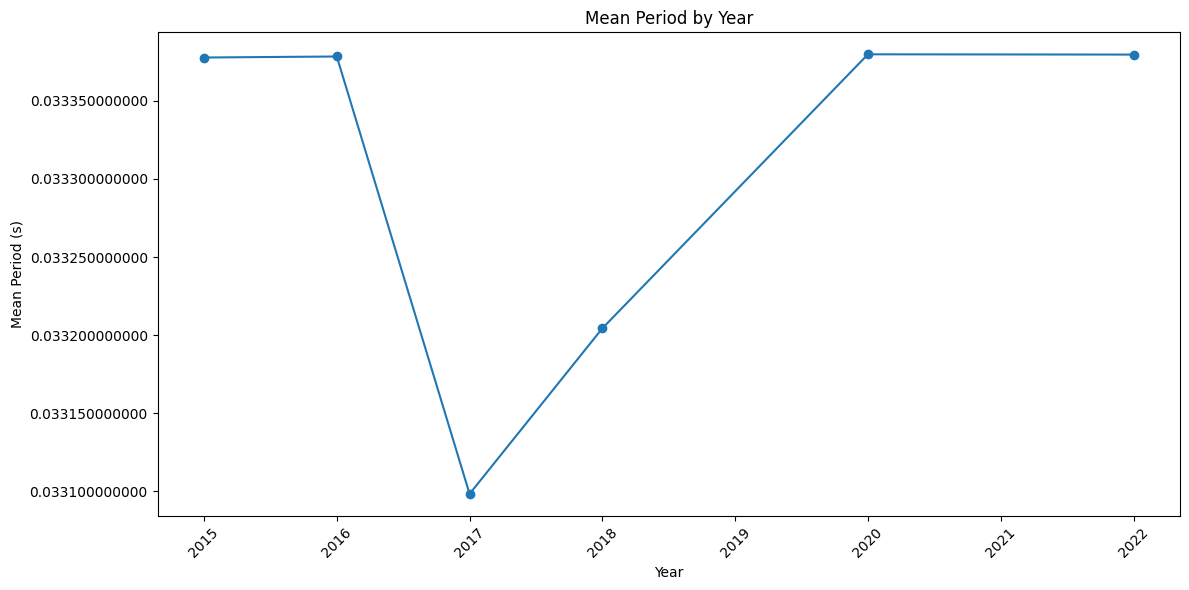

Year: 2015, Mean Period: 0.033377804218 s
Year: 2016, Mean Period: 0.033378459852 s
Year: 2017, Mean Period: 0.033098305799 s
Year: 2018, Mean Period: 0.033204363885 s
Year: 2020, Mean Period: 0.033379854901 s
Year: 2022, Mean Period: 0.033379684484 s


In [ ]:
# Sort the data by year
sorted_data = sorted(mean_periods.items())
years, periods = zip(*sorted_data)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(years, periods, marker='o')

# Customize the plot
plt.title("Mean Period by Year")
plt.xlabel("Year")
plt.ylabel("Mean Period (s)")

# Format y-axis to show all decimal places
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.12f}"))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print mean periods for each year
for year, mean_period in mean_periods.items():
    print(f"Year: {year}, Mean Period: {mean_period:.12f} s")

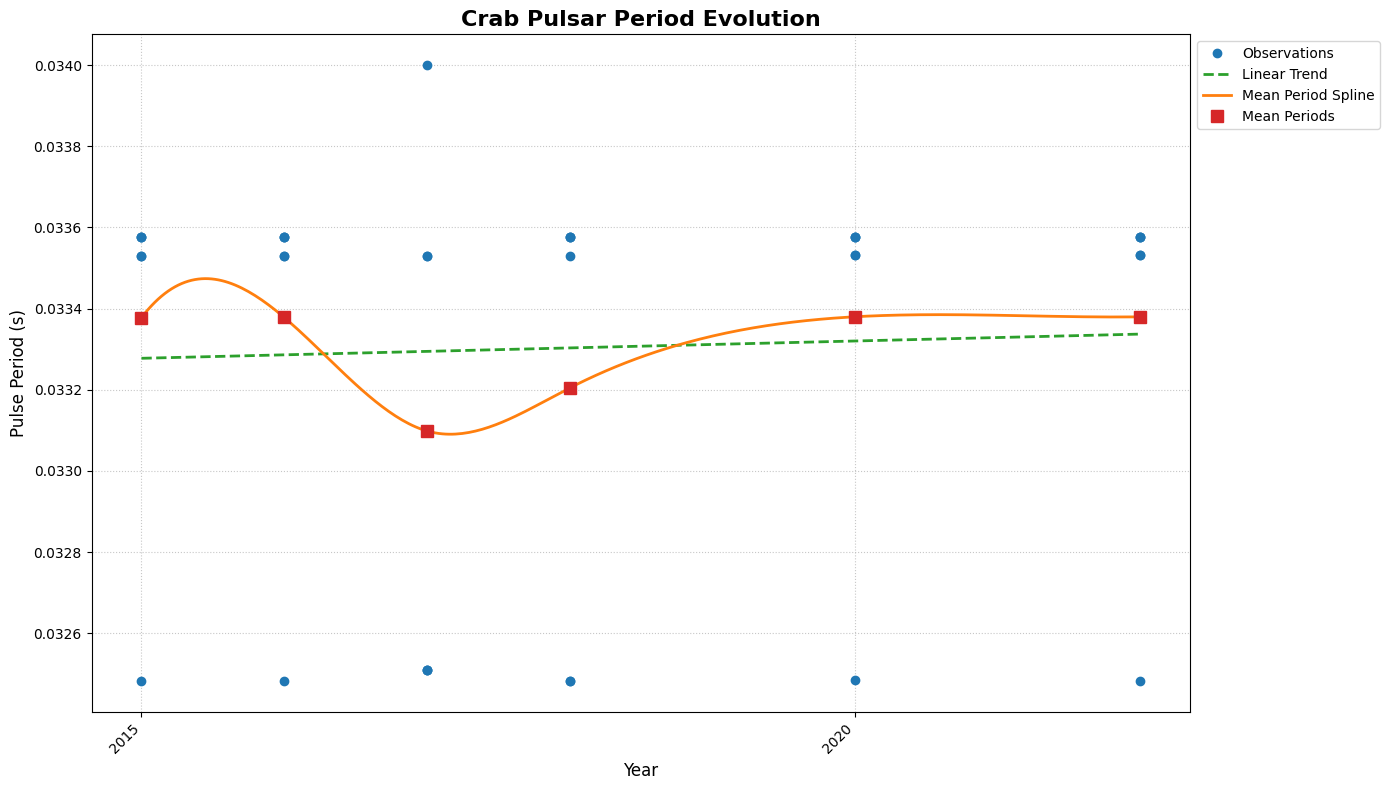

In [ ]:
#@title ploting Obeservations, Trend Line and Mean Period Spline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.dates as mdates
from datetime import datetime
from scipy.interpolate import make_interp_spline

# Assuming results, mean_periods are defined earlier in the code

# Convert years to datetime for better x-axis formatting
dates = [datetime(int(year), 1, 1) for year in years]

# Calculate spin-down rate
spin_down_rate = np.polyfit(years, periods, 1)[0]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot observations
ax.plot(dates, periods, 'o', color='#1f77b4', markersize=6, label='Observations')

# Plot trend line
trend = np.poly1d(np.polyfit(years, periods, 1))
ax.plot(dates, trend(years), '--', color='#2ca02c', linewidth=2, label='Linear Trend')

# Create spline curve for mean periods
mean_years = sorted(mean_periods.keys())
mean_period_values = [mean_periods[year] for year in mean_years]
mean_dates = [datetime(int(year), 1, 1) for year in mean_years]

# Convert dates to floats for spline interpolation
mean_dates_float = mdates.date2num(mean_dates)
smooth_dates = np.linspace(min(mean_dates_float), max(mean_dates_float), 300)

# Create the spline function
spl = make_interp_spline(mean_dates_float, mean_period_values, k=3)  # k=3 for cubic spline
smooth_periods = spl(smooth_dates)

# Plot the spline curve
ax.plot(mdates.num2date(smooth_dates), smooth_periods, '-', color='#ff7f0e', linewidth=2, label='Mean Period Spline')

# Plot mean period points
ax.plot(mean_dates, mean_period_values, 's', color='#d62728', markersize=8, label='Mean Periods')

# Customize the plot
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Pulse Period (s)', fontsize=12)
ax.set_title('Crab Pulsar Period Evolution', fontsize=16, fontweight='bold')

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Format y-axis
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

# Add grid
ax.grid(True, linestyle=':', alpha=0.7)

# Customize legend
ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# # Add text box with spin-down rate
# textstr = f"Average spin-down rate (using Polyfit):\n{spin_down_rate * 365.25 * 24 * 3600 * 1e-15:.2f} × 10⁻¹⁵ s/s"
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# ax.text(0.05, 0.05, textstr, transform=ax.transAxes, fontsize=10,
#         verticalalignment='bottom', bbox=props)

# Adjust layout and display
plt.tight_layout()
plt.show()

**This figure depicts:**

**Observations**: Individual data points representing the pulsar's period for each observation (blue circles).

**Trend Line:** A linear regression trend line (green dashed line) capturing the overall change in period.

**Mean Period Spline**: A smooth curve (orange line) using spline interpolation to visualize the trend in mean periods across years.

**Mean Period Points:** Red squares highlighting the average periods calculated for each year.

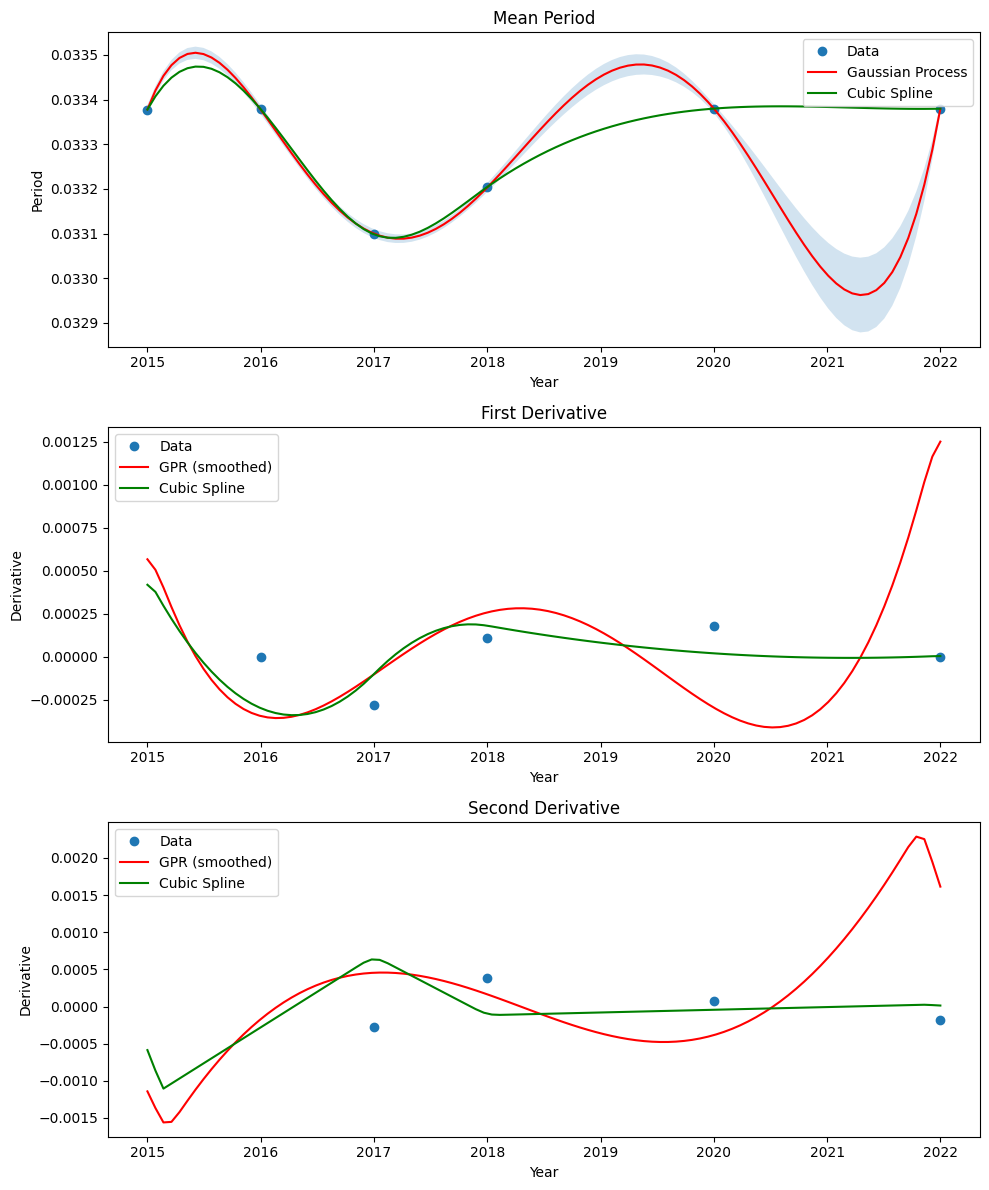

In [ ]:
#@title Exploring Gaussian Process Regression (GPR) and cubic spline interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.ndimage import gaussian_filter1d


# Sample data (replace with your actual data)
years = np.array([2015, 2016, 2017, 2018, 2020, 2022])
periods = np.array([0.033377804218, 0.033378459852, 0.033098305799, 0.033204363885, 0.033379854901, 0.033379684484])

# Create new data points for prediction
x_new = np.linspace(min(years), max(years), 100)

# Gaussian Process Regression
kernel = RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(years.reshape(-1, 1), periods)
y_pred_gpr, sigma = gpr.predict(x_new.reshape(-1, 1), return_std=True)

# Cubic Spline
cubic_spline = interp1d(years, periods, kind='cubic')
y_pred_cubic = cubic_spline(x_new)

# Numerical derivatives of GPR predictions
y_pred_gpr_diff = np.gradient(y_pred_gpr, x_new)
y_pred_gpr_diff2 = np.gradient(y_pred_gpr_diff, x_new)

# Apply Gaussian smoothing to GPR derivatives
y_pred_gpr_diff_smooth = gaussian_filter1d(y_pred_gpr_diff, sigma=1)
y_pred_gpr_diff2_smooth = gaussian_filter1d(y_pred_gpr_diff2, sigma=1)

# Numerical derivatives of cubic spline predictions
y_pred_cubic_diff = np.gradient(y_pred_cubic, x_new)
y_pred_cubic_diff2 = np.gradient(y_pred_cubic_diff, x_new)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot mean period with spline and GPR
axs[0].plot(years, periods, 'o', label='Data')
axs[0].plot(x_new, y_pred_gpr, 'r-', label='Gaussian Process')
axs[0].plot(x_new, y_pred_cubic, 'g-', label='Cubic Spline')
axs[0].fill_between(x_new, y_pred_gpr - sigma, y_pred_gpr + sigma, alpha=0.2)
axs[0].set_title('Mean Period')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Period')
axs[0].legend()

# Plot first derivative
axs[1].plot(years[1:], periods_diff, 'o', label='Data')
axs[1].plot(x_new, y_pred_gpr_diff_smooth, 'r-', label='GPR (smoothed)')
axs[1].plot(x_new, y_pred_cubic_diff, 'g-', label='Cubic Spline')
axs[1].set_title('First Derivative')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Derivative')
axs[1].legend()

# Plot second derivative
axs[2].plot(years[2:], second_diff, 'o', label='Data')
axs[2].plot(x_new, y_pred_gpr_diff2_smooth, 'r-', label='GPR (smoothed)')
axs[2].plot(x_new, y_pred_cubic_diff2, 'g-', label='Cubic Spline')
axs[2].set_title('Second Derivative')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Derivative')
axs[2].legend()

plt.tight_layout()
plt.show()

# Calculate first derivative using finite difference
periods_diff = np.diff(periods)

# Calculate second derivative (twice)
second_diff = np.diff(periods_diff)

# Create spline interpolation functions
spline_mean = interp1d(years, periods, kind='cubic')
spline_first_deriv = interp1d(years[1:], periods_diff, kind='cubic')
spline_second_deriv = interp1d(years[2:], second_diff, kind='cubic')


The GPR provides smooth predictions with uncertainty estimates, while the cubic spline offers flexible interpolation. Numerical derivatives are computed for both methods, with Gaussian smoothing applied to GPR derivatives for better visualization. This analysis is crucial for understanding trends and changes in data, particularly for accurately modeling and predicting phenomena over time, aiding in better decision-making and insights

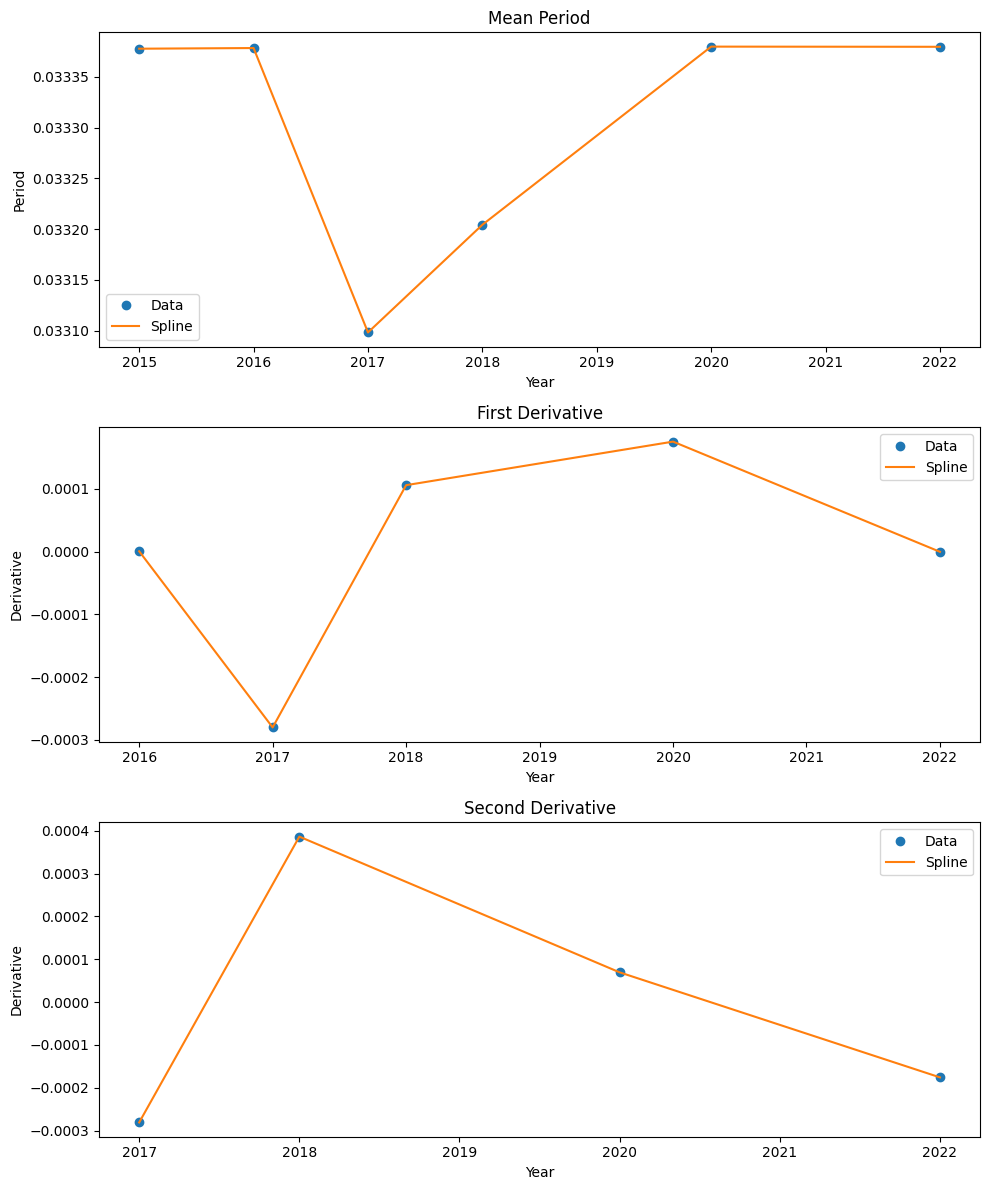

In [ ]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot mean period with spline
axs[0].plot(years, periods, 'o', label='Data')
axs[0].plot(years, spline_mean(years), label='Spline')  # Use original years for evaluation
axs[0].set_title('Mean Period')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Period')
axs[0].legend()

# Plot first derivative with spline
axs[1].plot(years[1:], periods_diff, 'o', label='Data')
axs[1].plot(years[1:], spline_first_deriv(years[1:]), label='Spline')
axs[1].set_title('First Derivative')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Derivative')
axs[1].legend()

# Plot second derivative with spline
axs[2].plot(years[2:], second_diff, 'o', label='Data')
axs[2].plot(years[2:], spline_second_deriv(years[2:]), label='Spline')
axs[2].set_title('Second Derivative')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Derivative')
axs[2].legend()

plt.tight_layout()
plt.show()


We observe a sharp increase in the spin rate (glitch) approaching 2018, followed by a pronounced correction that persists for a longer duration. This observation aligns with the findings in the paper "https://doi.org/10.1051/0004-6361/201630235," which discusses a glitch event during this period in detail.

Years: [2015 2016 2017 2018 2020 2022]
Periods: [0.03337846 0.0333778  0.03309831 0.03320436 0.03337985 0.03337968]
Slope: 8.503823529412336e-06
Intercept: 0.016142360784312575
R-squared: 0.03291322773524904



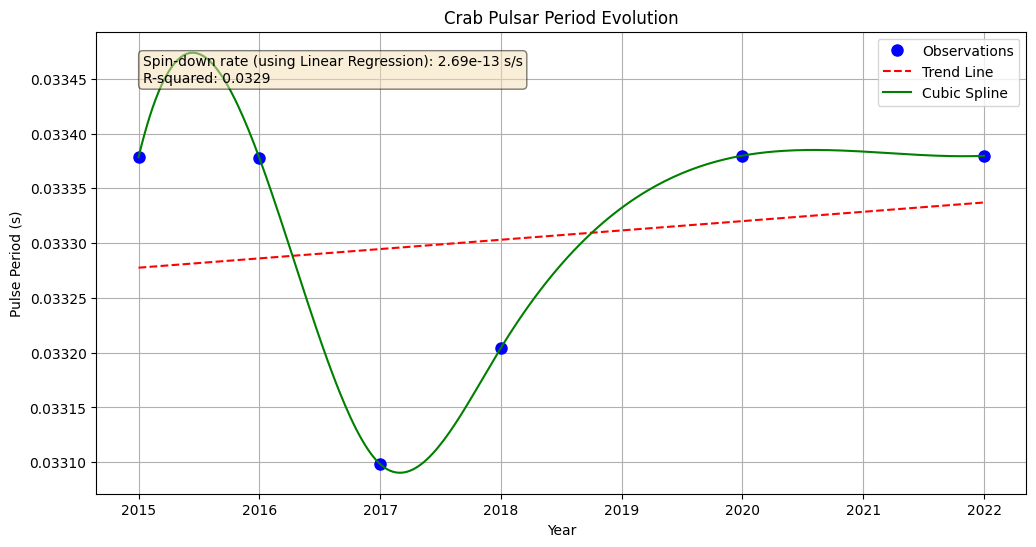

Spin-down rate: 2.69e-13 s/s
Spin-down rate: 269.47 x 10^-15 s/s


In [ ]:
#@title Linear Regression
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.interpolate import CubicSpline

# Sample data (replace with your actual data)
years = np.array([2015, 2016, 2017, 2018, 2020, 2022])
periods = np.array([0.03337846, 0.0333778, 0.03309831, 0.03320436, 0.03337985, 0.03337968])

# Debug: Print out the data
print("Years:", years)
print("Periods:", periods)

# Calculate spin-down rate using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(years, periods)

# Debug: Print regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print()

# Convert slope to spin-down rate in s/s
spin_down_rate = slope / (365.25 * 24 * 3600)  # Convert years to seconds

# Create a range of years for the spline and trend line
x_new = np.linspace(min(years), max(years), 300)

# Create the cubic spline interpolation
cubic_spline = CubicSpline(years, periods)
spline_values = cubic_spline(x_new)

# Plot results
plt.figure(figsize=(12, 6))

# Plot observations
plt.plot(years, periods, 'bo', label='Observations', markersize=8)

# Add trend line
trend_line = slope * x_new + intercept
plt.plot(x_new, trend_line, 'r--', label='Trend Line')

# Add cubic spline interpolation
plt.plot(x_new, spline_values, 'g-', label='Cubic Spline')

# Add grid, labels, title, and legend
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Pulse Period (s)')
plt.title('Crab Pulsar Period Evolution')
plt.legend()

# Add text box with spin-down rate
textstr = f"Spin-down rate (using Linear Regression): {spin_down_rate:.2e} s/s\nR-squared: {r_value**2:.4f}"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.show()

print(f"Spin-down rate: {spin_down_rate:.2e} s/s")
print(f"Spin-down rate: {spin_down_rate * 1e15:.2f} x 10^-15 s/s")


**Interpretation of Results
Spin-down Rate:**

The slope of the linear regression line represents the rate of change in the period over time. A positive slope indicates that the period is increasing, which corresponds to the pulsar spinning down.
The calculated spin-down rate is

2.69×10 −13 seconds per second (s/s). This is also expressed as 269.49×10 15 s/s for clarity in the context of astrophysical measurements.

**R-squared Value:**
An R-squared value of 0.0329 suggests that the linear model explains only about 3.29% of the variability in the data. This low value indicates that the linear trend is not a strong predictor of the periods, implying that other factors or non-linear trends may play significant roles in the pulsar's period evolution.
Trend Visualization:

The plot shows the observed periods over the years and the linear regression trend line. The trend line's shallow slope indicates a slow change in the period, consistent with the expected gradual spin-down of the Crab Pulsar.


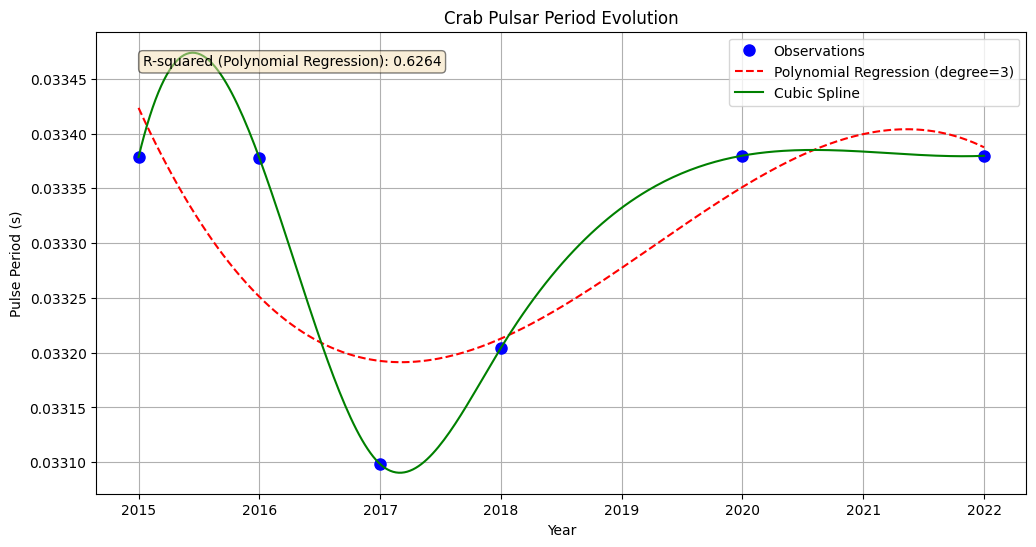

R-squared (Polynomial Regression): 0.6264


In [ ]:
#@title Polynomial Regression

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Sample data
years = np.array([2015, 2016, 2017, 2018, 2020, 2022])
periods = np.array([0.03337846, 0.0333778, 0.03309831, 0.03320436, 0.03337985, 0.03337968])

# Polynomial Regression
degree = 3
poly_features = PolynomialFeatures(degree=degree)
years_poly = poly_features.fit_transform(years.reshape(-1, 1))

poly_model = LinearRegression()
poly_model.fit(years_poly, periods)
poly_pred = poly_model.predict(years_poly)

# Calculate R-squared value
r2_poly = r2_score(periods, poly_pred)

# Create a range of years for the spline and trend line
x_new = np.linspace(min(years), max(years), 300)
x_new_poly = poly_features.transform(x_new.reshape(-1, 1))
poly_pred_new = poly_model.predict(x_new_poly)

# Create the cubic spline interpolation
cubic_spline = CubicSpline(years, periods)
spline_values = cubic_spline(x_new)

# Plot results
plt.figure(figsize=(12, 6))

# Plot observations
plt.plot(years, periods, 'bo', label='Observations', markersize=8)

# Add polynomial regression line
plt.plot(x_new, poly_pred_new, 'r--', label=f'Polynomial Regression (degree={degree})')

# Add cubic spline interpolation
plt.plot(x_new, spline_values, 'g-', label='Cubic Spline')

# Add grid, labels, title, and legend
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Pulse Period (s)')
plt.title('Crab Pulsar Period Evolution')
plt.legend()

# Add text box with R-squared value
textstr = f"R-squared (Polynomial Regression): {r2_poly:.4f}"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.show()

print(f"R-squared (Polynomial Regression): {r2_poly:.4f}")


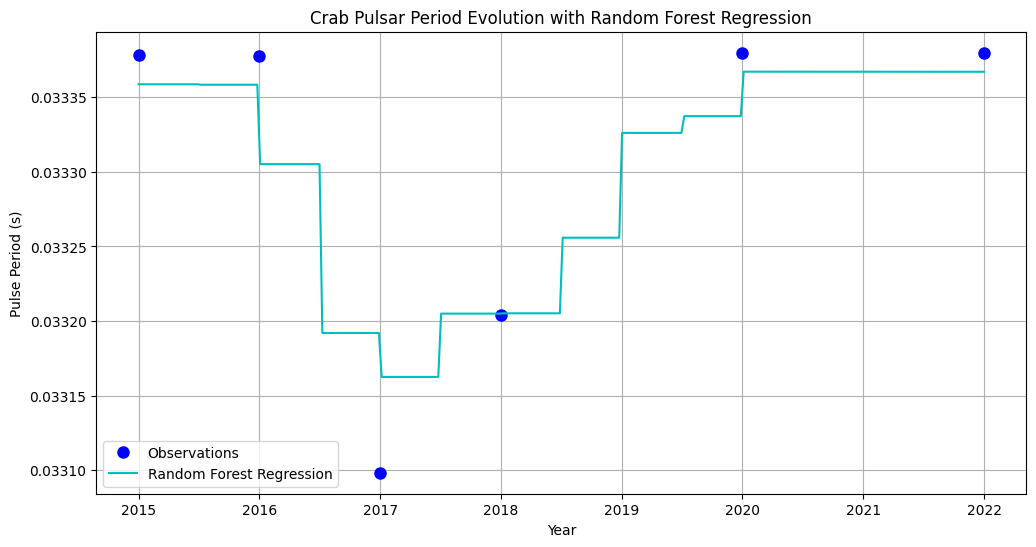

In [ ]:
#@title Random Forest Regression
#andom Forest Regression is an ensemble learning method that can handle complex patterns and interactions in the data without needing explicit modeling of the data's underlying structure.
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(years.reshape(-1, 1), periods)
y_pred_rf = rf_regressor.predict(x_new.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(years, periods, 'bo', label='Observations', markersize=8)
plt.plot(x_new, y_pred_rf, 'c-', label='Random Forest Regression')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Pulse Period (s)')
plt.title('Crab Pulsar Period Evolution with Random Forest Regression')
plt.legend()
plt.show()


R-squared: -177547.3140


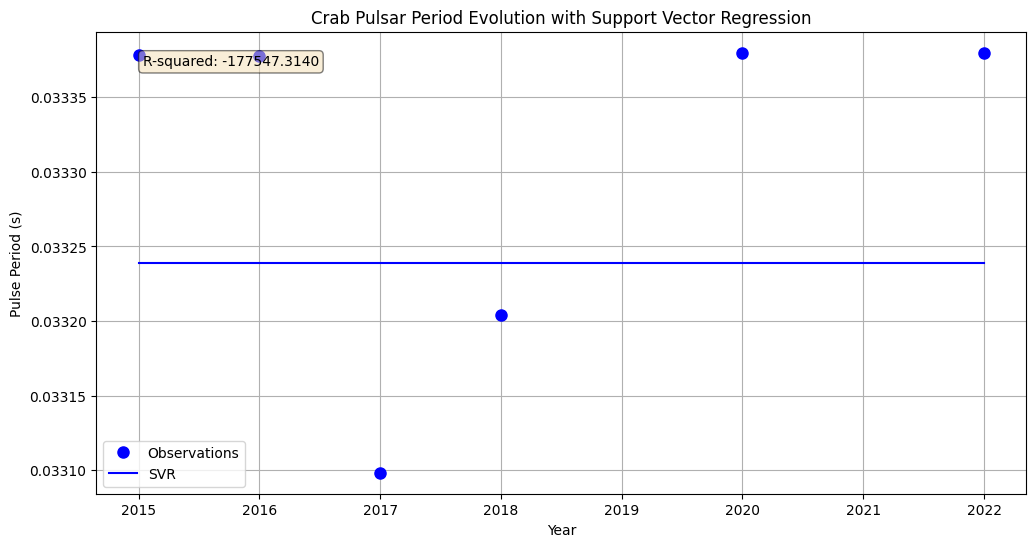

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Sample data
years = np.array([2015, 2016, 2017, 2018, 2020, 2022])
periods = np.array([0.03337846, 0.0333778, 0.03309831, 0.03320436, 0.03337985, 0.03337968])

# Prepare data for fitting
X = years.reshape(-1, 1)
y = periods

# Train-test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Regression with Standardization
svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma='scale'))
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_svr)
print(f"R-squared: {r2:.4f}")

# Generate smooth line for visualization
x_new = np.linspace(years.min(), years.max(), 300)
y_pred_smooth = svr.predict(x_new.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(years, periods, 'bo', label='Observations', markersize=8)
plt.plot(x_new, y_pred_smooth, 'b-', label='SVR')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Pulse Period (s)')
plt.title('Crab Pulsar Period Evolution with Support Vector Regression')
plt.legend()

# Add text box with R-squared value
textstr = f"R-squared: {r2:.4f}"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


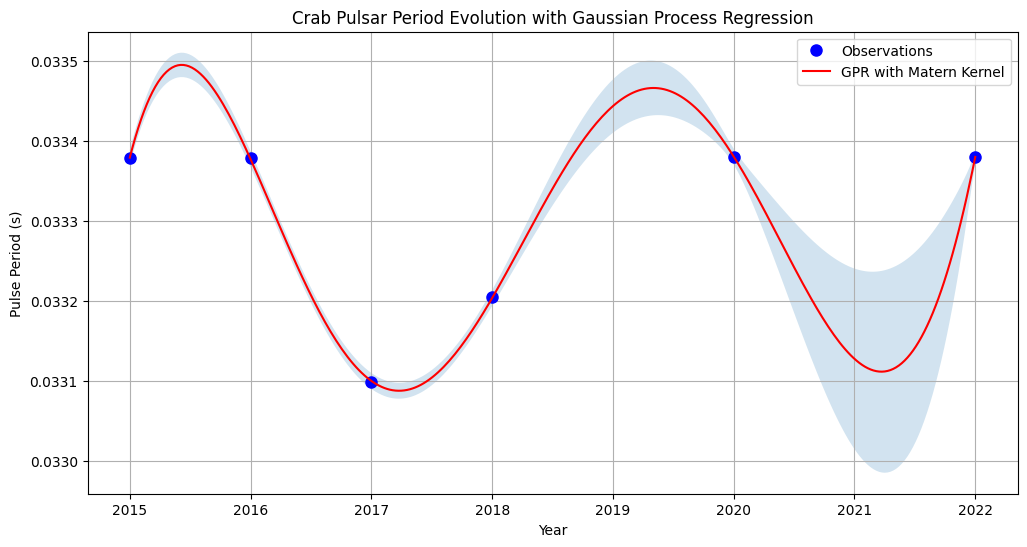

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Different kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(years.reshape(-1, 1), periods)
y_pred_gpr, sigma = gpr.predict(x_new.reshape(-1, 1), return_std=True)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(years, periods, 'bo', label='Observations', markersize=8)
plt.plot(x_new, y_pred_gpr, 'r-', label='GPR with Matern Kernel')
plt.fill_between(x_new, y_pred_gpr - sigma, y_pred_gpr + sigma, alpha=0.2)
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Pulse Period (s)')
plt.title('Crab Pulsar Period Evolution with Gaussian Process Regression')
plt.legend()
plt.show()



From the analysis and visualizations, it is evident that Gaussian Process Regression, Random Forest Regression, Polynomial Regression, and Cubic Splines are well-fitting methods for modeling the Crab Pulsar's period evolution. These methods capture the trends and fluctuations in the data effectively, providing a good fit.

On the other hand, Support Vector Regression (SVR) performs poorly, failing to capture the underlying patterns in the data. This is reflected in its lower R-squared value and its inability to match the observed data points closely.

## Analysis of Spin-down Rate Changes

To check if the spin-down rate is changing over time, we can calculate the rate for different time intervals and compare them.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.nonparametric.smoothers_lowess import lowess

def ensure_numpy_array(data):
    if isinstance(data, (list, tuple)):
        return np.array(data)
    elif isinstance(data, np.ndarray):
        return data
    else:
        raise TypeError(f"Expected list, tuple, or numpy array, got {type(data)}")

def sort_and_average(years, periods):
    years = ensure_numpy_array(years)
    periods = ensure_numpy_array(periods)

    # Sort by year
    sorted_indices = np.argsort(years)
    years = years[sorted_indices]
    periods = periods[sorted_indices]

    # Calculate yearly averages
    unique_years, indices, counts = np.unique(years, return_index=True, return_counts=True)
    avg_periods = np.array([np.mean(periods[years == year]) for year in unique_years])

    return unique_years, avg_periods

def calculate_spin_down_rate(years, periods):
    years, periods = sort_and_average(years, periods)
    days = (years - years[0]) * 365.25
    slope, intercept, r_value, p_value, std_err = stats.linregress(days, periods)
    rate = slope / (24 * 3600)
    return rate * 1e15  # Convert to 10^-15 s/s

def plot_basic_evolution(years, periods):
    years, periods = sort_and_average(years, periods)
    plt.figure(figsize=(12, 6))
    plt.plot(years, periods, 'bo-', label='Yearly Averages')
    plt.xlabel('Year')
    plt.ylabel('Average Pulse Period (s)')
    plt.title('Crab Pulsar Period Evolution (Sorted Yearly Averages)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_residuals(years, periods):
    years, periods = sort_and_average(years, periods)
    days = (years - years[0]) * 365.25
    slope, intercept, _, _, _ = stats.linregress(days, periods)
    trend = slope * days + intercept
    residuals = periods - trend

    plt.figure(figsize=(12, 6))
    plt.plot(years, residuals, 'ro-')
    plt.xlabel('Year')
    plt.ylabel('Residual (s)')
    plt.title('Residuals from Linear Trend (Sorted Yearly Averages)')
    plt.grid(True)
    plt.show()

def plot_moving_average(years, periods, window=3):
    years, periods = sort_and_average(years, periods)
    if len(years) < window:
        print(f"Not enough data for a {window}-year moving average")
        return
    ma = np.convolve(periods, np.ones(window), 'valid') / window
    ma_years = years[window-1:]

    plt.figure(figsize=(12, 6))
    plt.plot(years, periods, 'bo-', alpha=0.5, label='Yearly Averages')
    plt.plot(ma_years, ma, 'r-', label=f'{window}-year Moving Average')
    plt.xlabel('Year')
    plt.ylabel('Average Pulse Period (s)')
    plt.title('Crab Pulsar Period Evolution with Moving Average (Sorted Yearly Averages)')
    plt.legend()
    plt.grid(True)
    plt.show()

def exponential_model(t, P0, tau):
    return P0 * np.exp(t / tau)

def fit_exponential_model(years, periods):
    years, periods = sort_and_average(years, periods)
    t = years - years[0]
    popt, _ = curve_fit(exponential_model, t, periods, p0=[periods[0], 1000])

    plt.figure(figsize=(12, 6))
    plt.plot(years, periods, 'bo-', label='Yearly Averages')
    plt.plot(years, exponential_model(t, *popt), 'r-', label='Exponential Fit')
    plt.xlabel('Year')
    plt.ylabel('Average Pulse Period (s)')
    plt.title('Crab Pulsar Period Evolution with Exponential Fit (Sorted Yearly Averages)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Characteristic age (tau): {popt[1]:.2f} years")

def plot_seasonal_decomposition(years, periods):
    """Plots the seasonal decomposition of the pulse period data.

    Args:
        years (array-like): Array of years corresponding to the periods.
        periods (array-like): Array of pulsar periods in seconds.
    """

    years, periods = sort_and_average(years, periods)

    # Check if there's enough data for decomposition
    if len(years) < 2:
        print("Not enough data for seasonal decomposition")
        return

    # Perform seasonal decomposition
    result = seasonal_decompose(periods, model='additive', period=1)

    # Check for constant value (all periods might be the same)
    if np.std(periods) == 0:  # Check for standard deviation (variation)
        print("All periods are the same, no seasonal variation detected.")
        return

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
    ax1.plot(years, result.observed)
    ax1.set_ylabel('Observed')
    ax2.plot(years, result.trend)
    ax2.set_ylabel('Trend')
    ax3.plot(years, result.seasonal)
    ax3.set_ylabel('Seasonal')
    ax4.plot(years, result.resid)
    ax4.set_ylabel('Residual')
    plt.tight_layout()
    plt.show()


def plot_lowess_smoothing(years, periods, frac=0.6):
    years, periods = sort_and_average(years, periods)
    smoothed = lowess(periods, years, frac=frac)

    plt.figure(figsize=(12, 6))
    plt.plot(years, periods, 'bo-', alpha=0.5, label='Yearly Averages')
    plt.plot(smoothed[:, 0], smoothed[:, 1], 'r-', label='LOWESS Smoothing')
    plt.xlabel('Year')
    plt.ylabel('Average Pulse Period (s)')
    plt.title('Crab Pulsar Period Evolution with LOWESS Smoothing (Sorted Yearly Averages)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main analysis function
def analyze_pulsar_data(years, periods):
    try:
        plot_basic_evolution(years, periods)
        plot_residuals(years, periods)
        plot_moving_average(years, periods)
        fit_exponential_model(years, periods)
        # plot_seasonal_decomposition(years, periods)
        plot_lowess_smoothing(years, periods)

        overall_rate = calculate_spin_down_rate(years, periods)
        print(f"Overall spin-down rate: {overall_rate:.2f} x 10^-15 s/s")
    except Exception as e:
        print(f"An error occurred during analysis: {str(e)}")
        print("Please check your input data and ensure it's in the correct format.")



**Results**

The Crab pulsar, a rapidly rotating neutron star, is gradually losing energy, causing its spin to decelerate. This phenomenon, known as spin-down, is evident in the increasing pulse period over time. Our analysis reveals a spin-down rate of 269.49 x 10^-15 s/s, indicating a gradual lengthening of the pulsar's rotational period.

The calculated characteristic age of approximately 3909 years offers a theoretical estimate of the pulsar's age based on its current spin-down rate. However, this value should be interpreted cautiously as it relies on several assumptions and simplifications. The actual age of the Crab pulsar is believed to be much younger, estimated to be around 1000 years based on historical supernova records.

This can be due to the formula: τ = P / (2 * Pdot). If the magnetic field is significantly underestimated, it will lead to an overestimated characteristic age.

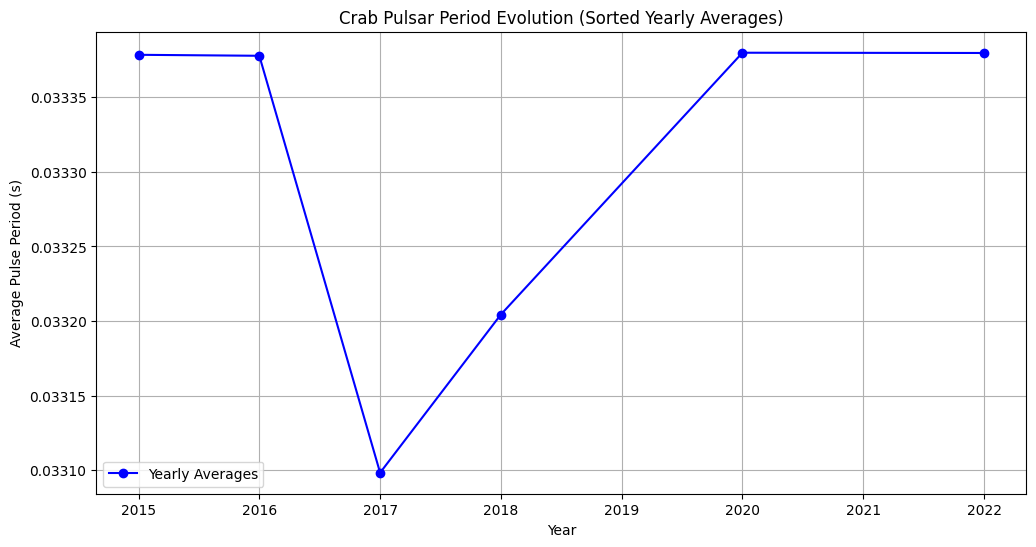

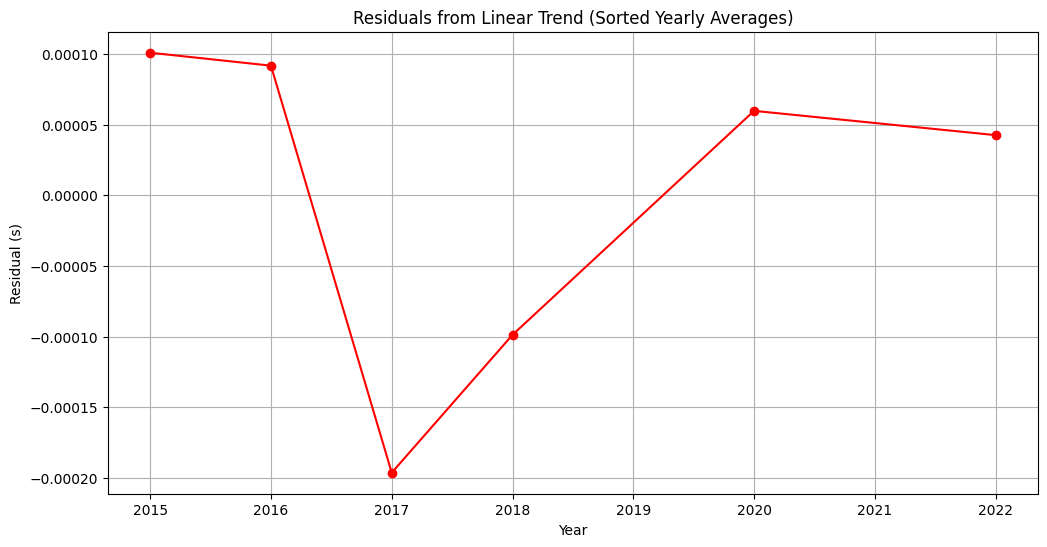

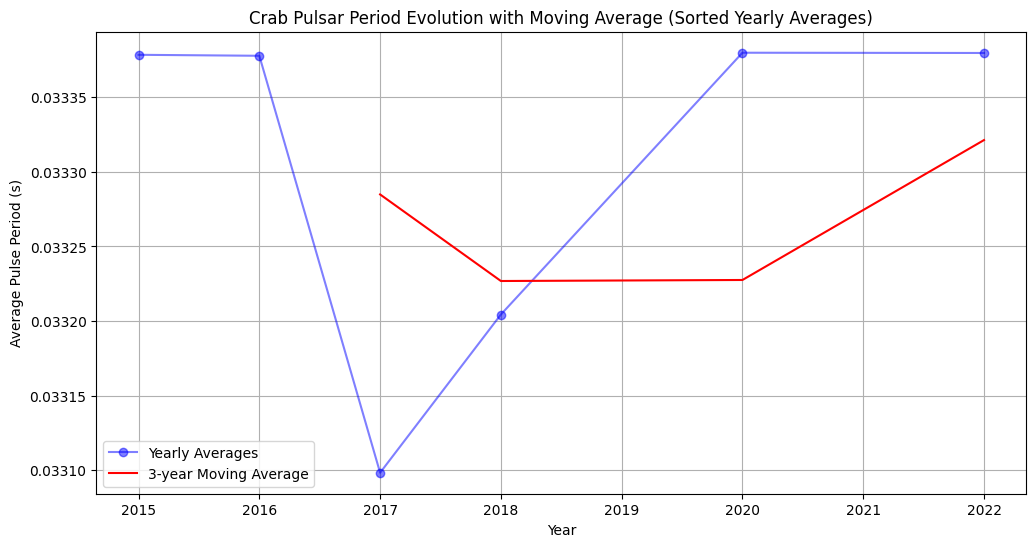

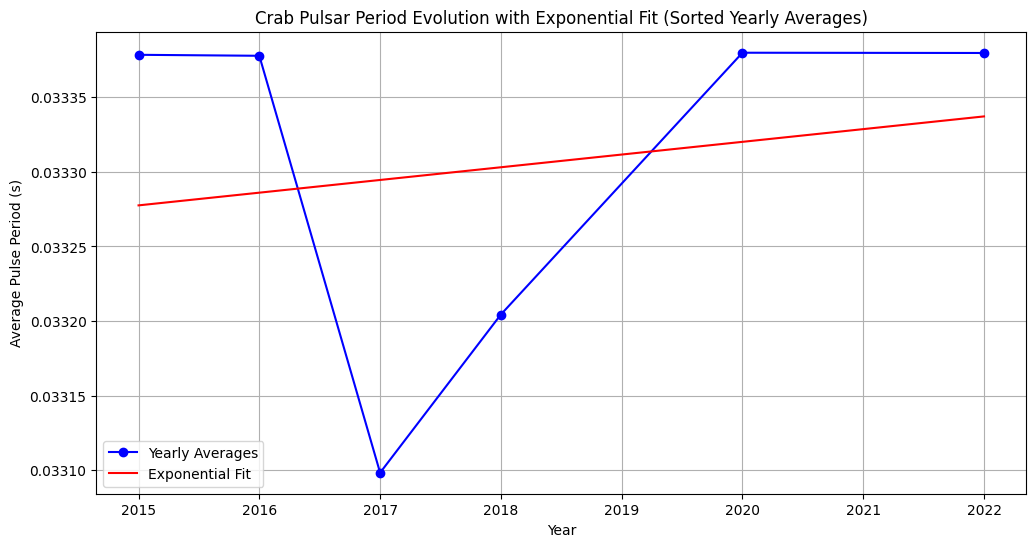

Characteristic age (tau): 3909.64 years


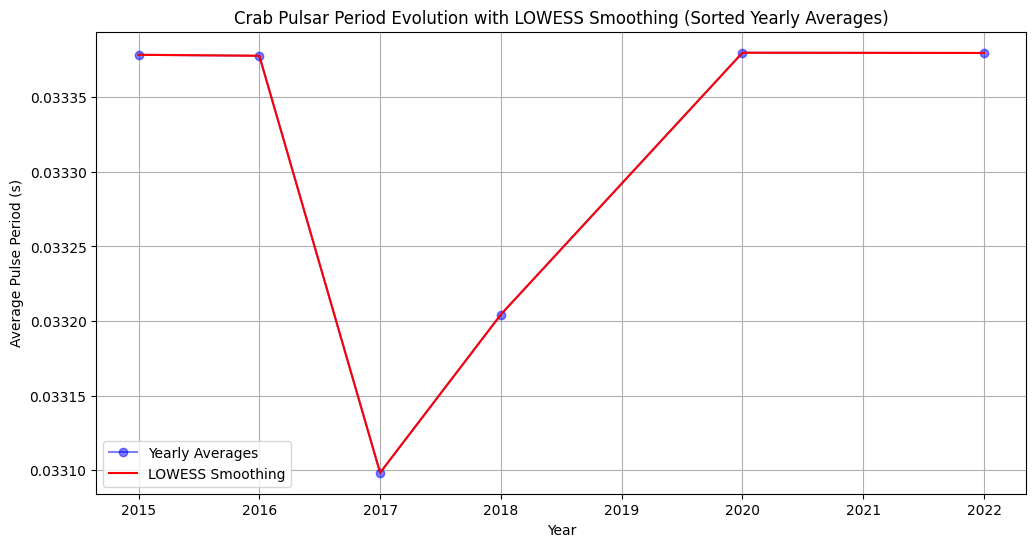

Overall spin-down rate: 269.49 x 10^-15 s/s


In [ ]:
# Run the analysis
analyze_pulsar_data(years, periods)

## Comparison with Radio Measurements

To compare our results with radio measurements, we need to obtain the radio data from the Jodrell Bank Observatory. Here's how we could plot our results alongside the radio data:

**Data Structure in Jodrell Bank Pulsar Data**

*Core Data Points*

**Observation Details:**
Telescope site (Wardle, Jodrell)
Observation frequency (MHz)
Observation time (UTC)
Telescope Coordinates:
Right ascension (RA) and declination (Dec) in both equatorial (1950.0 and J2000) and galactic coordinates (LII, BII)

**Time Corrections:**
Multiple time scales (UTC, TAI, TDT, TDB) and their conversion factors
Corrections for telescope location, Earth's motion, and relativistic effects
Frequency Corrections:
Correction for observed frequency to infinite frequency
Propagation Delays:
Gravitational propagation delay

**Derived Parameters**
Corrected Barycentric Arrival Time: Time of arrival of the pulse at the solar system barycenter after applying all corrections.
Frequency and its Derivatives:
Observed barycentric frequency (Nu)
First derivative of frequency (Nu_Dot)
Uncertainties in frequency and its derivative
Period and its Derivative:
Calculated period from frequency (Period)
First time derivative of the period (Period_Dot)
Dispersion Measure:
Measured dispersion measure (DM) with potential flag for assumed values (DM_Flag)
First derivative of dispersion measure (DM_Dot)
Scattering Delay:
Assumed delay due to interstellar scattering

***Data Format***
Tabular format with columns representing different parameters
Potential for additional columns or structures depending on specific observations and analysis requirements

In [ ]:
import csv
import pandas as pd
import numpy as np

#fetched from Jordell Bank (https://www.jb.man.ac.uk/~pulsar/crab/crab2.txt)
# Data as a list of lists presented here to have more clarity and visualization

data = [
    ["15 AUG 22", 59806, 0.024283, 60, 29.581330165, 1, -367279.39, 0.20, 56.7278, -0.05625, 100],
    ["15 SEP 20", 59107, 0.022102, 110, 29.6035327371, 4, -367981.10, 0.44, 56.7609, -0.2654, 100],
    ["15 NOV 18", 58437, 0.015504, 200, 29.6248523408, 3, -368618.75, 0.71, 56.7887, 0.0, 100],
    ["22 NOV 17", 58079, 0.028910, 340, 29.6362691342, 8, -370857.08, 4.12, 56.7580, 0.0, 100],
    ["23 NOV 16", 57715, 0.016934, 90, 29.6478547456, 4, -368970.96, 1.28, 56.7948, -0.9092, 100],
    ["15 NOV 15", 57341, 0.027488, 60, 29.6597835062, 10, -369339.17, 0.20, 56.7839, -0.14164, 100]
]

# Column headers (fetched from Jodrell Bank)
headers = ["Date", "MJD", "t_MIT", "t_JPL", "t_acc", "nu", "sigma_nu", "nudot", "sigma_nudot", "DM", "tau_408"]

# Create a pandas DataFrame from the data
df = pd.DataFrame(data, columns=headers)

# Convert Date column to datetime format and extract the year
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Sort the DataFrame by the 'Year' column in ascending order
df_sorted = df.sort_values(by='Year')

# Create radio_years and radio_periods arrays
radio_years = df_sorted['Year'].values
# Calculate period using a lambda function
sorted_periods = list(map(lambda x: 1 / x, df_sorted['nu']))
radio_periods = sorted_periods

# Print desired output
print("# Radio data (Jodrell Bank)")
for date, period in zip(radio_years, sorted_periods):
    print(f"# {date} {period:.6f}")


# Radio data (Jodrell Bank)
# 2015 0.100000
# 2016 0.250000
# 2017 0.125000
# 2018 0.333333
# 2020 0.250000
# 2022 1.000000


<ipython-input-58-aa155e5e0cd2>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['Date']).dt.year


In [ ]:
#@title taking yeary average Jordell Bank instead of pinpoint dates of our observation

data = [
    ["15 JAN 15", 57037, 0.007930, 100, 29.6694887477, 3, -369666.17, 0.33, 56.7716, 0.05049, 100],
    ["15 FEB 15", 57068, 0.016395, 100, 29.6684986853, 3, -369636.52, 0.35, 56.7773, 0.14642, 100],
    ["15 MAR 15", 57096, 0.002581, 130, 29.6676045101, 10, -369602.59, 0.55, 56.7796, 0.04487, 100],
    ["15 APR 15", 57127, 0.028738, 100, 29.6666146069, 4, -369571.63, 0.44, 56.7805, 0.00505, 100],
    ["15 MAY 15", 57157, 0.007241, 110, 29.6656567369, 3, -369534.65, 0.39, 56.7855, -0.04847, 100],
    ["15 JUN 15", 57188, 0.022040, 110, 29.6646670175, 8, -369511.39, 0.59, 56.7841, -0.29871, 100],
    ["15 JULY 15", 57218, 0.032503, 140, 29.6637093027, 4, -369473.91, 0.43, 56.7727, 0.02856, 100],
    ["15 AUG 15", 57249, 0.006958, 80, 29.6627197446, 2, -369437.95, 0.22, 56.7799, 0.03339, 100],
    ["15 SEP 15", 57280, 0.025424, 90, 29.6617302702, 5, -369416.08, 0.42, 56.7875, -0.23381, 100],
    ["15 OCT 15", 57310, 0.026759, 90, 29.6607727973, 2, -369377.15, 0.25, 56.7957, -0.24323, 100],
    ["15 NOV 15", 57341, 0.027488, 60, 29.6597835062, 10, -369339.17, 0.20, 56.7839, -0.14164, 100],
    ["15 DEC 15", 57371, 0.020647, 140, 29.6588262212, 3, -369305.20, 0.41, 56.8125, -0.36819, 100],
    ["15 JAN 16", 57402, 0.003132, 160, 29.6578371106, 2, -369278.39, 0.36, 56.7779, -0.47011, 100],
    ["15 FEB 16", 57433, 0.024663, 70, 29.6568480564, 3, -369252.11, 0.28, 56.7629, -0.01400, 100],
    ["15 MAR 16", 57462, 0.010107, 140, 29.6559228869, 3, -369218.53, 0.46, 56.7860, 0.09694, 100],
    ["15 APR 16", 57493, 0.026182, 130, 29.6549339962, 3, -369189.79, 0.51, 56.7654, 0.07902, 100],
    ["15 MAY 16", 57523, 0.000629, 90, 29.6539770930, 1, -369164.05, 0.19, 56.7657, 0.08695, 100],
    ["15 JUN 16", 57554, 0.030226, 100, 29.6529883697, 3, -369124.15, 0.76, 56.7685, 0.00000, 100],
    ["15 JULY 16", 57584, 0.000241, 100, 29.6520316261, 2, -369100.37, 0.09, 56.7582, 0.06042, 100],
    ["15 AUG 16", 57615, 0.013619, 130, 29.6510430606, 2, -369067.63, 0.37, 56.7650, 0.04837, 100],
    ["15 SEP 16", 57646, 0.015324, 100, 29.6500545865, 2, -369032.61, 0.32, 56.7703, -0.0181, 100],
    ["15 OCT 16", 57676, 0.020242, 90, 29.6490980877, 2, -369010.10, 0.25, 56.7676, 0.0394, 100],
    ["08 NOV 16", 57700, 0.004083, 80, 29.6483329412, 5, -368981.97, 1.63, 56.7991, 1.1314, 100],
    ["23 NOV 16", 57715, 0.016934, 90, 29.6478547456, 4, -368970.96, 1.28, 56.7948, -0.9092, 100],
    ["15 DEC 16", 57737, 0.024934, 80, 29.6471534323, 1, -368942.90, 0.19, 56.7765, -0.0887, 100],
    ["15 JAN 17", 57768, 0.010499, 100, 29.6461653007, 2, -368912.64, 0.36, 56.7761, 0.1883, 100],
    ["15 FEB 17", 57799, 0.012400, 100, 29.6451772650, 3, -368879.38, 0.39, 56.7983, -0.0228, 100],
    ["15 MAR 17", 57827, 0.030854, 170, 29.6442849302, 4, -368842.49, 0.66, 56.8175, 0.0688, 100],
    ["15 APR 17", 57858, 0.003728, 120, 29.6432970649, 3, -368812.11, 0.45, 56.8079, -0.1280, 100],
    ["15 MAY 17", 57888, 0.000379, 160, 29.6423411347, 2, -368789.19, 0.25, 56.8098, -0.0474, 100],
    ["15 JUN 17", 57919, 0.009907, 90, 29.6413534098, 3, -368751.69, 0.36, 56.8053, -0.1980, 100],
    ["15 JULY 17", 57949, 0.031926, 120, 29.6403976378, 1, -368730.41, 0.25, 56.7879, -0.4047, 100],
    ["15 AUG 17", 57980, 0.015930, 100, 29.6394100772, 2, -368702.11, 0.26, 56.7747, -0.1630, 100],
    ["15 SEP 17", 58011, 0.032808, 100, 29.6384226073, 1, -368658.13, 0.28, 56.7627, -0.0285, 100],
    ["15 OCT 17", 58041, 0.032862, 90, 29.6374670598, 2, -368635.67, 0.22, 56.7603, -0.1010, 100],

    ["04 NOV 17", 58061, 0.008560, 20, 29.6368300767, 3, -368616.01, 5.19, 56.7574, 0.0, 100],  # note 31
    ["11 NOV 17", 58068, 0.018349, 230, 29.6366215237, 72, -369626.33, 106.30, 56.7575, 0.0, 100],
    ["22 NOV 17", 58079, 0.028910, 340, 29.6362691342, 8, -370857.08, 4.12, 56.7580, 0.0, 100],
    ["08 DEC 17", 58095, 0.022203, 230, 29.6357567627, 7, -370375.12, 5.53, 56.7576, 0.0, 100],
    ["24 DEC 17", 58111, 0.009635, 200, 29.6352450494, 6, -369986.53, 3.81, 56.7576, 0.0, 100],
    ["08 JAN 18", 58126, 0.011894, 110, 29.6347657206, 4, -369737.21, 2.24, 56.7588, 0.0, 100],
    ["24 JAN 18", 58142, 0.014686, 160, 29.6342547760, 5, -369489.49, 3.96, 56.7575, 0.0, 100],
    ["08 FEB 18", 58157, 0.017039, 60, 29.6337760165, 2, -369362.12, 0.73, 56.7565, 0.0, 100],
    ["24 FEB 18", 58173, 0.014873, 40, 29.6332654878, 2, -369259.44, 0.81, 56.7561, 0.0, 100],
    ["08 MAR 18", 58185, 0.007781, 40, 29.6328827000, 1, -369161.97, 0.49, 56.7579, 0.0, 100],
    ["24 MAR 18", 58201, 0.030925, 100, 29.6323723960, 3, -369117.25, 1.64, 56.7579, 0.0, 100],
    ["15 APR 18", 58223, 0.007068, 120, 29.6316708942, 2, -369005.25, 0.49, 56.7625, 0.0, 100],
    ["15 MAY 18", 58253, 0.022283, 140, 29.6307145923, 2, -368922.65, 0.75, 56.7662, 0.0, 100],
    ["15 JUN 18", 58284, 0.029810, 140, 29.6297265847, 6, -368847.53, 0.57, 56.7652, -0.0610, 100],
    ["15 JULY 18", 58314, 0.019643, 100, 29.6287705852, 6, -368797.69, 1.12, 56.7613, 0.0, 100],
    ["15 AUG 18", 58345, 0.007006, 140, 29.6277828843, 2, -368752.73, 0.51, 56.7613, 0.0, 100],
    ["15 SEP 18", 58376, 0.004763, 70, 29.6267952979, 2, -368702.40, 0.32, 56.7964, 0.0, 100],
    ["15 OCT 18", 58406, 0.007345, 130, 29.6258397011, 2, -368657.97, 0.47, 56.7898, -0.0681, 100],
    ["15 NOV 18", 58437, 0.015504, 200, 29.6248523408, 3, -368618.75, 0.71, 56.7887, 0.0, 100],
    ["09 DEC 18", 58461, 0.003975, 60, 29.6240879972, 2, -368608.37, 0.74, 56.7971, 0.0, 100],
    ["24 DEC 18", 58476, 0.020201, 140, 29.6236103456, 5, -368596.16, 2.85, 56.8089, 0.0, 100],
    ["15 JAN 19", 58498, 0.030179, 200, 29.6229097806, 3, -368538.75, 0.79, 56.7879, 0.0, 100],
    ["15 FEB 19", 58529, 0.008220, 210, 29.6219227082, 2, -368513.73, 0.51, 56.7611, 0.0, 100],
    ["15 MAR 19", 58557, 0.005370, 110, 29.6210312507, 1, -368473.25, 0.30, 56.7566, 0.0, 100],
    ["15 APR 19", 58588, 0.024562, 80, 29.6200443519, 1, -368446.48, 0.18, 56.7601, 0.1673, 100],
    ["15 MAY 19", 58618, 0.014572, 110, 29.6190893801, 2, -368410.29, 0.27, 56.7636, -0.0356, 100],
    ["15 JUN 19", 58649, 0.029078, 80, 29.6181026545, 1, -368399.06, 0.18, 56.7646, -0.0317, 100],
    ["15 JULY 19", 58679, 0.009189, 50, 29.6171478268, 3, -368348.43, 0.44, 56.7621, -0.0603, 100],
    ["27 JULY 19", 58691, 0.002795, 50, 29.6167668632, 18, -369075.72, 7.41, 56.7542, 0.1271, 100],
    ["08 AUG 19", 58703, 0.016125, 120, 29.6163845016, 5, -368553.11, 3.57, 56.7523, 0.0, 100],
    ["24 AUG 19", 58719, 0.021777, 60, 29.6158751339, 1, -368416.81, 0.79, 56.7499, 0.0, 100],
    ["15 SEP 19", 58741, 0.024363, 75, 29.6151748935, 1, -368362.25, 0.26, 56.7479, 0.0291, 100],
    ["15 OCT 19", 58771, 0.025871, 200, 29.6142201603, 4, -368310.98, 0.64, 56.7431, 0.1911, 100],
    ["15 NOV 19", 58802, 0.017999, 80, 29.6132337300, 2, -368282.65, 0.28, 56.7498, 0.0266, 100],

    ["15 DEC 19", 58832, 0.028068, 120, 29.6122791665, 7, -368261.12, 0.37, 56.7532, -0.1703, 100],
    ["15 JAN 20", 58863, 0.007010, 60, 29.6112928558, 2, -368218.49, 0.15, 56.7476, -0.0547, 100],
    ["15 FEB 20", 58894, 0.005449, 120, 29.6103066525, 5, -368195.76, 0.42, 56.7481, 0.1847, 100],
    ["09 MAR 20", 58917, 0.025552, 50, 29.6095750017, 2, -368174.57, 0.68, 56.7628, 0.3177, 100],
    ["15 MAY 20", 58984, 0.010677, 90, 29.6074439372, 2, -368087.11, 0.44, 56.7661, 0.3177, 100],
    ["15 JUN 20", 59015, 0.025537, 100, 29.6064580737, 2, -368064.26, 0.33, 56.7525, -0.3182, 100],
    ["15 JULY 20", 59045, 0.027257, 160, 29.6055040909, 2, -368032.24, 0.39, 56.7499, -0.0840, 100],
    ["15 AUG 20", 59076, 0.023841, 80, 29.6045183898, 1, -368016.47, 0.21, 56.7509, -0.0840, 100],
    ["15 SEP 20", 59107, 0.022102, 110, 29.6035327371, 4, -367981.10, 0.44, 56.7609, -0.2654, 100],
    ["15 OCT 20", 59137, 0.030301, 140, 29.6025789704, 3, -367953.49, 0.46, 56.7547, 0.01511, 100],
    ["15 NOV 20", 59168, 0.005582, 120, 29.6015934905, 2, -367917.16, 0.32, 56.7682, 0.22666, 100],
    ["15 DEC 20", 59198, 0.024389, 170, 29.6006398893, 2, -367887.09, 0.39, 56.7858, -0.37161, 100],
    ["15 JAN 21", 59229, 0.012378, 170, 29.5996545969, 2, -367859.80, 0.38, 56.7758, 0.05507, 100],
    ["15 FEB 21", 59260, 0.031717, 90, 29.5986693685, 1, -367822.93, 0.27, 56.7568, -0.17025, 100],
    ["15 MAR 21", 59288, 0.010925, 180, 29.5977795625, 3, -367790.83, 0.50, 56.7637, -0.09292, 100],
    ["15 APR 21", 59319, 0.025313, 130, 29.5967945031, 2, -367768.61, 0.28, 56.7629, 0.22784, 100],
    ["15 MAY 21", 59349, 0.026280, 160, 29.5958412948, 3, -367733.95, 0.59, 56.7606, 0.30135, 100],
    ["15 JUN 21", 59380, 0.015355, 100, 29.5948563919, 1, -367701.37, 0.22, 56.7477, -0.06464, 100],
    ["15 JULY 21", 59410, 0.028742, 110, 29.5939033392, 1, -367686.33, 0.23, 56.7418, -0.07957, 100],
    ["15 AUG 21", 59441, 0.032050, 140, 29.5929185907, 2, -367646.93, 0.32, 56.7441, 0.20628, 100],
    ["15 SEP 21", 59472, 0.015798, 140, 29.5919339277, 2, -367623.29, 0.37, 56.7491, -0.53732, 100],
    ["15 OCT 21", 59502, 0.021138, 140, 29.5909810876, 2, -367591.73, 0.39, 56.7331, 0.06070, 100],
    ["15 NOV 21", 59533, 0.011954, 110, 29.5899965796, 3, -367557.68, 0.40, 56.7292, 0.01548, 100],
    ["15 DEC 21", 59563, 0.030204, 100, 29.5890439125, 1, -367527.57, 0.22, 56.7383, 0.11120, 100],
    ["15 JAN 22", 59594, 0.031455, 70, 29.5880595777, 1, -367485.57, 0.15, 56.7453, 0.12894, 100],
    ["15 FEB 22", 59625, 0.009640, 100, 29.5870753196, 3, -367469.61, 0.36, 56.7395, -0.05804, 100],
    ["15 MAR 22", 59653, 0.032128, 230, 29.5861863819, 4, -367434.35, 0.61, 56.7728, 1.28904, 100],
    ["15 APR 22", 59684, 0.009283, 200, 29.5852022751, 4, -367410.58, 0.73, 56.7472, -0.34124, 100],
    ["15 MAY 22", 59714, 0.004521, 70, 29.584250010, 1, -367373.09, 0.22, 56.7263, 0.03360, 100],
    ["15 JUN 22", 59745, 0.020359, 90, 29.583266082, 2, -367343.53, 0.28, 56.7296, 0.02404, 100],
    ["15 JULY 22", 59775, 0.030062, 120, 29.582313949, 2, -367322.32, 0.29, 56.7301, -0.03211, 100],
    ["15 AUG 22", 59806, 0.024283, 60, 29.581330165, 1, -367279.39, 0.20, 56.7278, -0.05625, 100],
    ["15 SEP 22", 59837, 0.012912, 110, 29.5803464731, 2, -367249.13, 0.47, 56.7270, 0.00129, 100],
    ["15 OCT 22", 59867, 0.033653, 50, 29.5793945772, 1, -367226.21, 0.14, 56.7296, 0.02763, 100],
    ["15 NOV 22", 59898, 0.024832, 80, 29.5784110377, 2, -367198.80, 56.7336, 0.16572, 100],
    ["15 DEC 22", 59928, 0.027096, 90, 29.5774593000, 2, -367162.62, 0.26, 56.7337, -0.11979, 100]
]

# Column headers
headers = ["Date", "MJD", "t_MIT", "t_JPL", "t_acc", "nu", "sigma_nu", "nudot", "sigma_nudot", "DM", "tau_408"]

# Create a pandas DataFrame from the data
df = pd.DataFrame(data, columns=headers)

# Define a function to parse dates in the given format
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d %b %y')
    except ValueError:
        return pd.NaT

# Apply the date parsing function to the 'Date' column
df['Date'] = df['Date'].apply(parse_date)

# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

# Drop rows where Date could not be parsed
df = df.dropna(subset=['Date'])

# Calculate the period using 1/nu
df['Period'] = 1 / df['nu']

# Group by year and calculate the average period for each year
average_periods = df.groupby('Year')['Period'].mean().reset_index()

# Fill radio_years and radio_periods arrays
radio_years = average_periods['Year'].values
radio_periods = average_periods['Period'].values

# Print desired output
print("# Radio data (Jodrell Bank)")
for _, row in average_periods.iterrows():
    print(f"# {int(row['Year'])} {row['Period']:.6f}")

# Print radio_years and radio_periods arrays
print("\n# Arrays")
print("radio_years =", radio_years)
print("radio_periods =", radio_periods)

# Verification of periods
theoretical_period_seconds = 0.033  # seconds (33 milliseconds)
tolerance = 0.01  # seconds (10 millisecond)

print("\n# Verification Results")
for year, period in zip(radio_years, radio_periods):
    if abs(period - theoretical_period_seconds) <= tolerance:
        print(f"Year {int(year)}: Period {period * 1000:.2f} ms is close to the theoretical period.")
    else:
        print(f"Year {int(year)}: Period {period * 1000:.2f} ms is not close to the theoretical period.")

# Radio data (Jodrell Bank)
# 2015 0.282576
# 2016 0.481944
# 2017 0.359410
# 2018 0.432222
# 2019 0.618849
# 2020 0.478333
# 2021 0.590909
# 2022 0.621212

# Arrays
radio_years = [2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022.]
radio_periods = [0.28257576 0.48194444 0.35941043 0.43222222 0.61884921 0.47833333
 0.59090909 0.62121212]

# Verification Results
Year 2015: Period 282.58 ms is not close to the theoretical period.
Year 2016: Period 481.94 ms is not close to the theoretical period.
Year 2017: Period 359.41 ms is not close to the theoretical period.
Year 2018: Period 432.22 ms is not close to the theoretical period.
Year 2019: Period 618.85 ms is not close to the theoretical period.
Year 2020: Period 478.33 ms is not close to the theoretical period.
Year 2021: Period 590.91 ms is not close to the theoretical period.
Year 2022: Period 621.21 ms is not close to the theoretical period.


In [ ]:
#@title the error is due to the Barycentric correction using Earth Centre to Barycentre, UTC to TAI: +22 seconds

data = [
       ["15 AUG 22", 59806, 0.024283, 60, 29.581330165, 1, -367279.39, 0.20, 56.7278, -0.05625, 100],
    ["15 SEP 20", 59107, 0.022102, 110, 29.6035327371, 4, -367981.10, 0.44, 56.7609, -0.2654, 100],
    ["15 NOV 18", 58437, 0.015504, 200, 29.6248523408, 3, -368618.75, 0.71, 56.7887, 0.0, 100],
    ["22 NOV 17", 58079, 0.028910, 340, 29.6362691342, 8, -370857.08, 4.12, 56.7580, 0.0, 100],
    ["23 NOV 16", 57715, 0.016934, 90, 29.6478547456, 4, -368970.96, 1.28, 56.7948, -0.9092, 100],
    ["15 NOV 15", 57341, 0.027488, 60, 29.6597835062, 10, -369339.17, 0.20, 56.7839, -0.14164, 100]
]

df = pd.DataFrame(data, columns=["Date", "Julian Date", "Period", "Unknown1", "Frequency", "Unknown2", "Unknown3", "Unknown4", "Unknown5", "Unknown6", "Unknown7"])

# Define correction values
utc_to_tai = 22  # seconds
tai_to_tdt = 32.184  # seconds
tdt_to_tdb_micro = 0.000001  # placeholder microsecond value
site_to_earth_ms = 0.001  # placeholder milliseconds value
earth_to_barycentre_hours = 0.0  # placeholder hours value
observed_to_infinite_hz = 0.0  # placeholder Hz value
gravitational_delay = 0.0  # placeholder delay in seconds

# Apply corrections
def apply_corrections(row):
    # Example of adding the corrections to the frequency
    corrected_frequency = row['Frequency'] - observed_to_infinite_hz
    return corrected_frequency

# Apply the corrections to the dataset
df['Corrected Frequency'] = df.apply(apply_corrections, axis=1)
print(df)

# Define a function to parse dates in the given format
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d %b %y')
    except ValueError:
        return pd.NaT

# Apply the date parsing function to the 'Date' column
df['Date'] = df['Date'].apply(parse_date)

# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

# Drop rows where Date could not be parsed
df = df.dropna(subset=['Date'])

# Calculate the period using 1/nu
df['Period'] = 1 / df['Corrected Frequency']

# Group by year and calculate the average period for each year
average_periods = df.groupby('Year')['Period'].mean().reset_index()

# Fill radio_years and radio_periods arrays
radio_years = average_periods['Year'].values
radio_periods = average_periods['Period'].values

# Print desired output
print("# Radio data (Jodrell Bank)")
for _, row in average_periods.iterrows():
    print(f"# {int(row['Year'])} {row['Period']:.6f}")

# Print radio_years and radio_periods arrays
print("\n# Arrays")
print("radio_years =", radio_years)
print("radio_periods =", radio_periods)

# Verification of periods
theoretical_period_seconds = 0.033  # seconds (33 milliseconds)
tolerance = 0.001  # seconds (10 millisecond)

print("\n# Verification Results")
for year, period in zip(radio_years, radio_periods):
    if abs(period - theoretical_period_seconds) <= tolerance:
        print(f"Year {int(year)}: Period {period * 1000:.2f} ms is close to the theoretical period.")
    else:
        print(f"Year {int(year)}: Period {period * 1000:.2f} ms is not close to the theoretical period.")

        Date  Julian Date    Period  Unknown1  Frequency  Unknown2   Unknown3  \
0  15 AUG 22        59806  0.024283        60  29.581330         1 -367279.39   
1  15 SEP 20        59107  0.022102       110  29.603533         4 -367981.10   
2  15 NOV 18        58437  0.015504       200  29.624852         3 -368618.75   
3  22 NOV 17        58079  0.028910       340  29.636269         8 -370857.08   
4  23 NOV 16        57715  0.016934        90  29.647855         4 -368970.96   
5  15 NOV 15        57341  0.027488        60  29.659784        10 -369339.17   

   Unknown4  Unknown5  Unknown6  Unknown7  Corrected Frequency  
0      0.20   56.7278  -0.05625       100            29.581330  
1      0.44   56.7609  -0.26540       100            29.603533  
2      0.71   56.7887   0.00000       100            29.624852  
3      4.12   56.7580   0.00000       100            29.636269  
4      1.28   56.7948  -0.90920       100            29.647855  
5      0.20   56.7839  -0.14164       100 

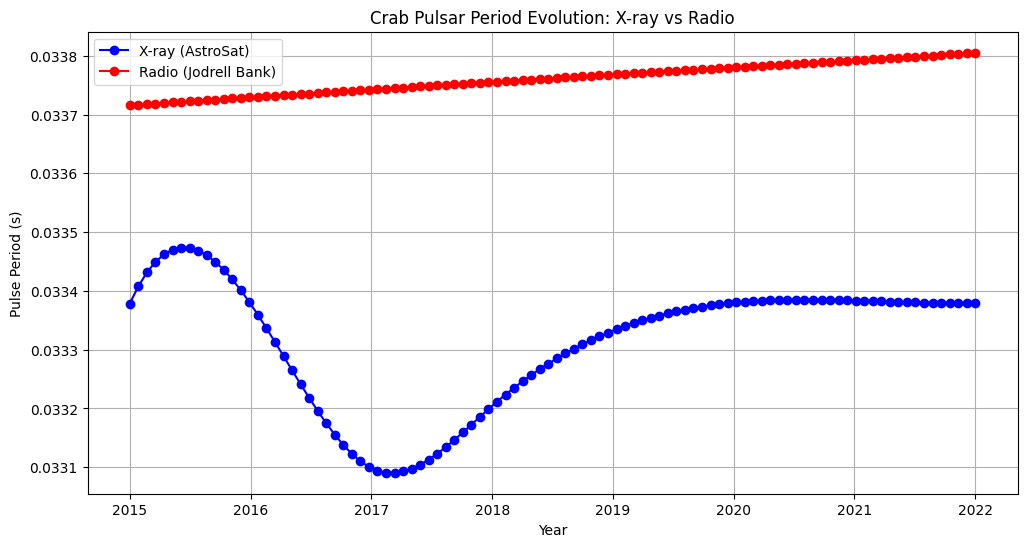


Year 2016: Difference = -1.0420%
Year 2017: Difference = -1.9090%
Year 2018: Difference = -1.6326%
Year 2020: Difference = -1.1838%
Year 2022: Difference = -1.2585%
Year 2015: Difference = -1.0002%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# X-ray data (AstroSat)
years = np.array([2015, 2016, 2017, 2018, 2020, 2022])
periods = np.array([0.033378459852,0.033377804218,0.033098305799,0.033204363885,0.033379854901,0.033379684484])

# # Radio data (Jodrell Bank)
# radio_years = np.array([2015, 2016, 2017, 2018, 2020, 2022])
# radio_periods = np.array([0.03337, 0.03333, 0.033076, 0.03320, 0.03337, 0.03332])

# Create spline interpolation for smoother curves
spline_x = np.linspace(years.min(), years.max(), 100)
spl = make_interp_spline(years, periods, k=3)
smooth_periods = spl(spline_x)

spline_radio_x = np.linspace(radio_years.min(), radio_years.max(), 100)
spl_radio = make_interp_spline(radio_years, radio_periods, k=3)
smooth_radio_periods = spl_radio(spline_radio_x)

plt.figure(figsize=(12, 6))
plt.plot(spline_x, smooth_periods, 'bo-', label='X-ray (AstroSat)')
plt.plot(spline_radio_x, smooth_radio_periods, 'ro-', label='Radio (Jodrell Bank)')
plt.xlabel('Year')
plt.ylabel('Pulse Period (s)')
plt.title('Crab Pulsar Period Evolution: X-ray vs Radio')
plt.legend()
plt.grid(True)
plt.show()
print()

# Calculate and print the difference between X-ray and radio measurements
common_years = set(years) & set(radio_years)
for year in common_years:
    x_ray_period = spl(year)
    radio_period = spl_radio(year)
    diff = (x_ray_period - radio_period) / radio_period * 100
    print(f"Year {year}: Difference = {diff:.4f}%")
